# Perceptron para compuerta lógica OR

El algoritmo para implementar el perceptron para la compuerta lógica OR, implementa
la siguiente función:

$$
\hat{y} = \Theta (w_1 x_1 + w_2 x_2 ... + w_n x_n + b ) \\
        = \Theta(w . X + b)
$$
\begin{equation}
donde \ \Theta(v) = \begin{cases}
      1, & \text{if}\ v \geq 0 \\
      0, & \text{otherwise}
    \end{cases}
\end{equation}

Para una elección particular de pesos del vector $w$ un un parámetro bias $b$, el modelo predice la salida $\hat{y}$ para las correspondientes entradas del vector $x$.

La tabla de verdad para la función lógica OR para variables binarias de 2-bit, por ejemplo, la entrada del vector $x: (x_1, x_2)$ y la correspondiente salida $y$.

|$x_1$|$x_2$| $y$ |
| --- | --- | --- |
|0    |0    |0    |
|0    |1    |1    |
|1    |0    |1    |
|1    |1    |1    |

Para el correspondiente peso del vector $w: (w_1,w_2)$ del vector de entrada
$x:(x_1, x_2)$, la funcion asociada al percetron puede definorse como:

$$
\hat{y} = \Theta (w_1 x_1 + w_2 x_2 + b ) 
$$


## Funcion de error

Para calcular el error del perceptron, tenemos la siguiente función:

$$
Error(w) = 1/2 (y - \hat{y} )^2 = 1/2 \left[ y - L \left(  \sum_{j=1}^{n} w_{j} x_{j} \right) \right]^2
$$

## Implementacion del perceptron en Python

In [123]:
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline

def umbral(v:int) -> int:
    """Funcion umbral"""
    return 1 if v >= 0 else 0

def predict(x:np.array, w:np.array, b:float) -> int:
    """Modelo del perceptron para hacer la prediccción"""
    v = (x @ w) + b
    actiovation_fn = umbral
    if len(v) > 1:
        # para mapear la funcion umbral en los valores de v cuando es un vector
        actiovation_fn = np.vectorize(actiovation_fn)
    y = actiovation_fn(v)
    return y
    
def costo(x:np.array, y:int, w:np.array, b:float):
    """Computa el costo, es decir, el error"""
    m = len(y) # numero renglones
    y_hat = predict(x, w, b)
    j =  np.power(y - y_hat ,2).sum()/(2*m)
    return j

def grad_costo(x, y, w, b, nu=0.001):
    """Gradientes y costo
    @param nu: taza de aprendizaje 
    """
    m = len(y) # numero de ejemplos de entrenamiento
    error = y - predict(x, w, b)
    # derivada de la funcion de costo, respecto a b
    db =  np.sum(nu * error)
    # derivada de la funcion de costo, respecto a w
    dw = np.zeros(len(w))
#     for i in range(len(w)):
#         for x_j in x[:,i]
#             dw[i] = nu * error * x_j
    
    for i in range(len(w)):
        dw[i] = (nu/m) * np.sum( error * x[:,i])
    return dw, db
    

Vamos a generar nuestros vectores de entrada $x:(x_1, x_2)$, la correspondiente salida $y$.

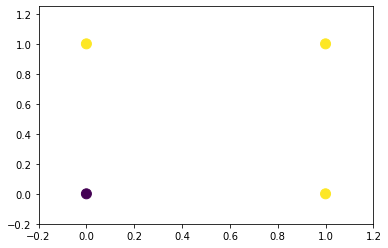

In [24]:
data_OR = np.array(
    [
        [0,0,0],
        [0,1,1],
        [1,0,1],
        [1,1,1]
    ]
    ,dtype=np.int32)
x = data_OR[:,:2]
y = data_OR[:,-1]
plt.scatter(x[:, 0], x[:, 1], c = y, s=100, cmap="viridis" )
plt.xlim([-0.2, 1.2]); plt.ylim([-0.2, 1.25]);
plt.show()

Vamos a inicializar nuestro vector $w: (w_1,w_2) y bias $b$

In [118]:
w = np.array([-1,1])
b = -0.5

Probamos la prediccion para los valores de $x$ que tenemo.

In [119]:
y_pred = predict(x, w, b)
for i,y_pi in enumerate(y_pred):
    print("OR({} , {}) =  {} , correcto={}".format(x[i,0], x[i,1], y_pi, "SI" if y_pi == y[i] else "no"))

OR(0 , 0) =  0 , correcto=SI
OR(0 , 1) =  1 , correcto=SI
OR(1 , 0) =  0 , correcto=no
OR(1 , 1) =  0 , correcto=no


In [120]:
j = costo(x, y, w, b)
print("Costo al probar w y b : {}".format(j))

Costo al probar w y b : 0.25


## Gradiente decendiente


Implementacion del algoritmo de gradiente descendiente

In [181]:
def grad_decent(x, y, w, b, nu=0.001, max_iteraciones=100, batch_size=100):
    """Algoritmo de gradiente descendiente"""
    w, b = w.copy(), b # para no alterar lo valores orginales
    J = np.zeros(max_iteraciones)
    x_line = np.linspace(0,1, 100)
    plt.scatter(x[:, 0], x[:, 1], c = y, s=100, cmap="viridis" )
    for iteracion in range(1,max_iteraciones+1):
        # calculamos los gradientes y costo
        dw, db  =  grad_costo(x, y, w, b, nu)
        # a ctualizar los gradientes en w y b
        w = w + dw
        b = b + db
        # acumulamos el erro
        j = costo(x,y,w,b)
        
        # revisamos convergencia
        if iteracion % batch_size == 0:
            print("Batch:{:.0f}  Costo:{:f} w:{} dw:{} d:{} db:{:f}".format(int(iteracion/batch_size), j,w, dw,b, db))
            # w0 X0 + w1 X1 + b = 0    x1 = (- b - w0 x0 )/ w1 
            y_line = -(w[0] * x_line + b)/w[1]
            #print("x({}) , y({})".format(x_line.shape, y_line.shape))
            plt.plot(x_line, y_line, color='k', linewidth=2)
        J[iteracion-1] = j    
        if j == 0:
            J = J[:iteracion]
            break
    plt.xlim([-0.2, 1.2]); plt.ylim([-0.2, 1.25]);
    return w, b, J
    

## Probando el gradiente descendiente

In [142]:
w = np.random.uniform(-1,1, size=2)
w

array([-0.18018895, -0.42116799])

Batch:1  Costo:0.125000 w:[-0.16945337 -0.74444657] dw:[0.25 0.25] d:1.4 db:1.500000
Batch:2  Costo:0.250000 w:[-0.16945337 -0.74444657] dw:[0. 0.] d:0.8999999999999999 db:-0.500000
Batch:3  Costo:0.125000 w:[-0.04445337 -0.61944657] dw:[0.125 0.125] d:0.8999999999999999 db:0.000000
Batch:4  Costo:0.375000 w:[-0.04445337 -0.61944657] dw:[0. 0.] d:0.3999999999999999 db:-0.500000
Batch:5  Costo:0.125000 w:[ 0.08054663 -0.36944657] dw:[0.125 0.25 ] d:0.8999999999999999 db:0.500000
Batch:6  Costo:0.125000 w:[ 0.08054663 -0.36944657] dw:[0. 0.] d:0.3999999999999999 db:-0.500000
Batch:7  Costo:0.375000 w:[ 0.08054663 -0.36944657] dw:[0. 0.] d:-0.10000000000000009 db:-0.500000
Batch:8  Costo:0.125000 w:[ 0.33054663 -0.11944657] dw:[0.25 0.25] d:1.4 db:1.500000
Batch:9  Costo:0.125000 w:[ 0.33054663 -0.11944657] dw:[0. 0.] d:0.8999999999999999 db:-0.500000
Batch:10  Costo:0.125000 w:[ 0.33054663 -0.11944657] dw:[0. 0.] d:0.3999999999999999 db:-0.500000
Batch:11  Costo:0.125000 w:[ 0.33054663 -

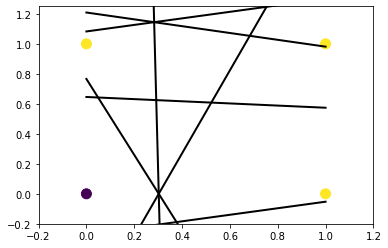

In [195]:
#w = np.array([0,0])
w = np.random.uniform(-1,1, size=2)
b = -0.1
nu = 0.5
max_iteraciones = 100

batch_size = 1
grad, b2, j_hist = grad_decent(x, y, w, b, nu, max_iteraciones, batch_size)
#print("gard:{}, b:{:f} loss:{:f}".format(grad, b2, j_hist.mean()))

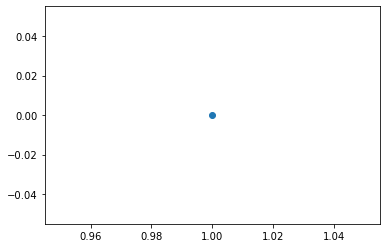

In [193]:
x_line = np.linspace(1,len(j_hist), len(j_hist))
#j_hist
plt.scatter(x_line, j_hist)

In [179]:
print("gard:{}, b:{:f} loss:{:f}".format(grad, b2, j_hist.mean()))

gard:[0.11527278 0.53963252], b:-0.100000 loss:0.181250


In [189]:
m=4
y_hat = [1,0,0,0]
j =  np.power(y - y_hat ,2).sum()/(2*m)
j

0.5

In [184]:
y

array([0, 1, 1, 1], dtype=int32)

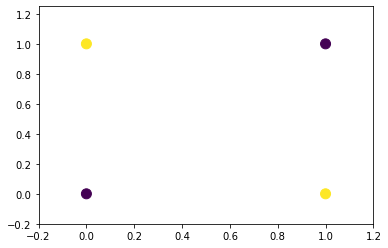

In [196]:
data_XOR = np.array(
    [
        [0,0,0],
        [0,1,1],
        [1,0,1],
        [1,1,0]
    ]
    ,dtype=np.int32)
x = data_XOR[:,:2]
y = data_XOR[:,-1]
plt.scatter(x[:, 0], x[:, 1], c = y, s=100, cmap="viridis" )
plt.xlim([-0.2, 1.2]); plt.ylim([-0.2, 1.25]);
plt.show()

Batch:1  Costo:0.125000 w:[-0.64293492 -0.73513304] dw:[0.125 0.125] d:0.9 db:1.000000
Batch:2  Costo:0.375000 w:[-0.64293492 -0.73513304] dw:[0. 0.] d:0.4 db:-0.500000
Batch:3  Costo:0.125000 w:[-0.51793492 -0.61013304] dw:[0.125 0.125] d:0.9 db:0.500000
Batch:4  Costo:0.375000 w:[-0.51793492 -0.61013304] dw:[0. 0.] d:0.4 db:-0.500000
Batch:5  Costo:0.250000 w:[-0.39293492 -0.48513304] dw:[0.125 0.125] d:0.9 db:0.500000
Batch:6  Costo:0.250000 w:[-0.51793492 -0.61013304] dw:[-0.125 -0.125] d:-0.09999999999999998 db:-1.000000
Batch:7  Costo:0.250000 w:[-0.39293492 -0.48513304] dw:[0.125 0.125] d:0.9 db:1.000000
Batch:8  Costo:0.250000 w:[-0.51793492 -0.61013304] dw:[-0.125 -0.125] d:-0.09999999999999998 db:-1.000000
Batch:9  Costo:0.250000 w:[-0.39293492 -0.48513304] dw:[0.125 0.125] d:0.9 db:1.000000
Batch:10  Costo:0.250000 w:[-0.51793492 -0.61013304] dw:[-0.125 -0.125] d:-0.09999999999999998 db:-1.000000
Batch:11  Costo:0.250000 w:[-0.39293492 -0.48513304] dw:[0.125 0.125] d:0.9 db:

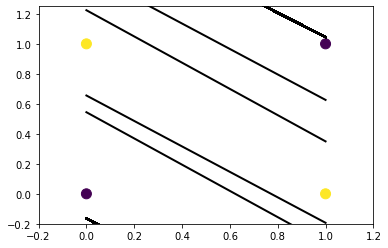

In [198]:
#w = np.array([0,0])
w = np.random.uniform(-1,1, size=2)
b = -0.1
nu = 0.5
max_iteraciones = 500

batch_size = 1
grad, b2, j_hist = grad_decent(x, y, w, b, nu, max_iteraciones, batch_size)